In [1]:
import pandas as pd
import numpy as np

In [2]:
hr_df = pd.read_csv("./EDA_DATA/HR Analytics.csv")
hr_df.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,...,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,TotalWorkingYears,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,Sales,1,2,Life Sciences,1,2,Female,...,8,11,3,1,8,1,6,4,0,5
1,49,0,Travel_Frequently,Research & Development,8,1,Life Sciences,2,3,Male,...,1,23,4,4,10,3,10,7,1,7
2,37,1,Travel_Rarely,Research & Development,2,2,Other,4,4,Male,...,6,15,3,2,7,3,0,0,0,0
3,33,0,Travel_Frequently,Research & Development,3,4,Life Sciences,5,4,Female,...,1,11,3,3,8,3,8,7,3,0
4,27,0,Travel_Rarely,Research & Development,2,1,Medical,7,1,Male,...,9,12,3,4,6,3,2,2,2,2


In [3]:
hr_df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'Gender', 'JobInvolvement', 'JobRole',
       'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome',
       'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'TotalWorkingYears', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

# 1.	What proportion of our staff are leaving?

In [4]:
hr_df.shape

(1470, 25)

In [5]:
round(len(hr_df[(hr_df.Attrition==1)])/len(hr_df.Attrition)*100)

16

## 2.	What role does gender and age play in this workplace?

In [6]:
#how many left are male and female
gen_age = hr_df[["Gender","Attrition","Department"]]
gen_age[gen_age.Attrition==1].groupby("Gender").size()

Gender
Female     87
Male      150
dtype: int64

In [7]:
#gender with the department
gen_age.groupby(["Gender","Department"]).size()

Gender  Department            
Female  Human Resources            20
        Research & Development    379
        Sales                     189
Male    Human Resources            43
        Research & Development    582
        Sales                     257
dtype: int64

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

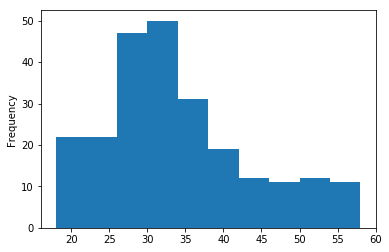

In [9]:
hr_df[hr_df.Attrition==1]["Age"].plot(kind="hist")

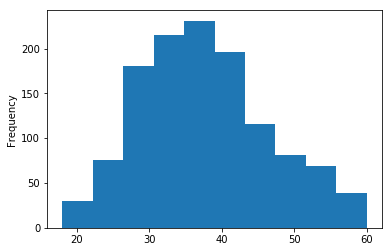

In [10]:
hr_df[hr_df.Attrition==0]["Age"].plot(kind="hist")

# 3.	How much does income matter?

In [11]:
month_income = hr_df[["Attrition","MonthlyIncome","PercentSalaryHike",'YearsAtCompany','YearsSinceLastPromotion']]
month_income = month_income[month_income.Attrition==1]
month_income.head()

,Attrition,MonthlyIncome,PercentSalaryHike,YearsAtCompany,YearsSinceLastPromotion
0,1,5993,11,6,0
2,1,2090,15,0,0
14,1,2028,14,4,0
21,1,3407,23,5,0
24,1,2960,11,4,1


In [12]:
min(hr_df.MonthlyIncome)

1009

In [13]:
max(hr_df.MonthlyIncome)

19999

In [14]:
hr_df.MonthlyIncome.mean()

6502.931292517007

In [15]:
def fun(df):
    if df.MonthlyIncome<5000:
        return "Low_Salary"
    elif (df.MonthlyIncome>5000)&(df.MonthlyIncome<7000):
        return "Mid_Salary"
    else:
        return "High_Salary"

In [16]:
newdf = pd.DataFrame()

for i, data in hr_df.iterrows():
    cur_row = pd.Series({"EmployeeNumber" : data['EmployeeNumber'],"Salary_Type" :fun(data)})
    newdf = newdf.append(cur_row, ignore_index=True)

In [17]:
newdf.head()

,EmployeeNumber,Salary_Type
0,1.0,Mid_Salary
1,2.0,Mid_Salary
2,4.0,Low_Salary
3,5.0,Low_Salary
4,7.0,Low_Salary


In [18]:
#merging
new_df = hr_df.merge(newdf)
new_df.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,...,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,TotalWorkingYears,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Salary_Type
0,41,1,Travel_Rarely,Sales,1,2,Life Sciences,1,2,Female,...,11,3,1,8,1,6,4,0,5,Mid_Salary
1,49,0,Travel_Frequently,Research & Development,8,1,Life Sciences,2,3,Male,...,23,4,4,10,3,10,7,1,7,Mid_Salary
2,37,1,Travel_Rarely,Research & Development,2,2,Other,4,4,Male,...,15,3,2,7,3,0,0,0,0,Low_Salary
3,33,0,Travel_Frequently,Research & Development,3,4,Life Sciences,5,4,Female,...,11,3,3,8,3,8,7,3,0,Low_Salary
4,27,0,Travel_Rarely,Research & Development,2,1,Medical,7,1,Male,...,12,3,4,6,3,2,2,2,2,Low_Salary


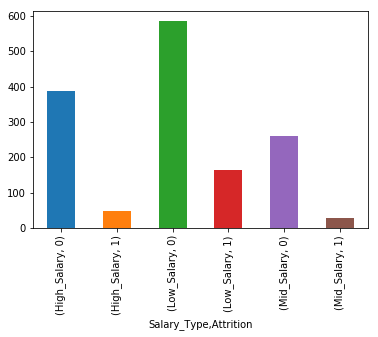

In [19]:
income_rel = new_df[["Attrition","Salary_Type"]]
income_rel.groupby("Salary_Type")["Attrition"].value_counts().plot(kind="bar")

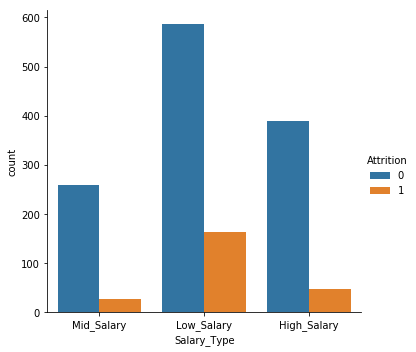

In [20]:
import seaborn as sns
sns.catplot(x="Salary_Type",hue="Attrition",kind="count",data=new_df)

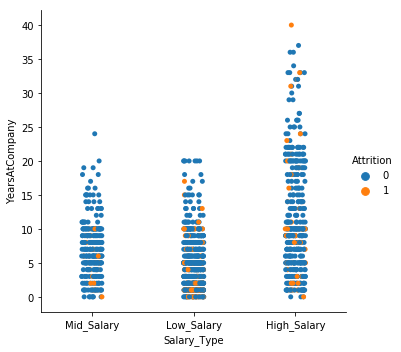

In [21]:
sns.catplot(y="YearsAtCompany",x="Salary_Type",hue="Attrition",data=new_df)

### 4.	What is the average age of the employees in each department excluding the outliers?

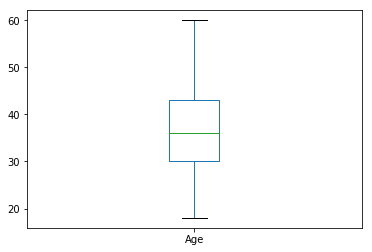

In [22]:
new_df.Age.plot(kind="box")

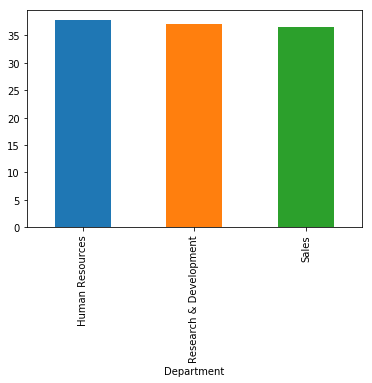

In [23]:
avg_dpt_age = new_df[["Department","Age"]]
avg_dpt_age.groupby("Department")["Age"].mean().plot(kind="bar")

## 5.	Which education field has the highest attrition rate for the employees with less than 5 years of work experience and monthly salary between 2000 and 4000 USD.

In [24]:
education_attr = new_df[["EducationField","Attrition","TotalWorkingYears","MonthlyIncome"]]

education_attr = education_attr[(new_df.TotalWorkingYears<5)&(new_df.MonthlyIncome>2000)&(new_df.MonthlyIncome<4000)]
education_attr = education_attr[education_attr.Attrition==1]

In [25]:
education_attr2 = education_attr.groupby(["EducationField","Attrition"]).size().reset_index()
education_attr2 = education_attr2.rename(columns={0:"Count"})
education_attr2["Attrition_Rate"] = round(education_attr2.Count/len(education_attr)*100)
education_attr2.sort_values(by="Attrition_Rate",ascending=False)

,EducationField,Attrition,Count,Attrition_Rate
1,Life Sciences,1,19,36.0
3,Medical,1,12,23.0
5,Technical Degree,1,9,17.0
2,Marketing,1,8,15.0
0,Human Resources,1,3,6.0
4,Other,1,2,4.0


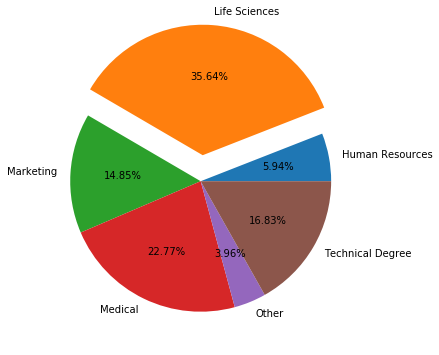

In [26]:
plt.rcParams["figure.figsize"]=8,6
ex=[0,0.2,0,0,0,0]
plt.pie(education_attr2.Attrition_Rate,labels=education_attr2.EducationField,autopct="%.2f%%",explode=ex)
plt.show()

## 6.	What is the average salary hike for the employees with work experience between 8 years to 10 years`

In [27]:
salary_hike = new_df[["TotalWorkingYears","PercentSalaryHike","MonthlyIncome"]]
salary_hike.head()

,TotalWorkingYears,PercentSalaryHike,MonthlyIncome
0,8,11,5993
1,10,23,5130
2,7,15,2090
3,8,11,2909
4,6,12,3468


In [28]:
#filtering only work ex of 8 - 10 years
salary_hike = salary_hike[(salary_hike.TotalWorkingYears>=8)&((salary_hike.TotalWorkingYears<=10))]
salary_hike.head()

,TotalWorkingYears,PercentSalaryHike,MonthlyIncome
0,8,11,5993
1,10,23,5130
3,8,11,2909
5,8,13,3068
8,10,21,9526


## 7.Is the “number of companies worked” normally distributed for the employees with work experience between 8 years and 10 years.

In [32]:
normally = hr_df[["NumCompaniesWorked","TotalWorkingYears"]]
normally = normally[(normally.TotalWorkingYears>=8)&((normally.TotalWorkingYears<=10))]
normally.head()

,NumCompaniesWorked,TotalWorkingYears
0,8,8
1,1,10
3,1,8
5,0,8
8,0,10


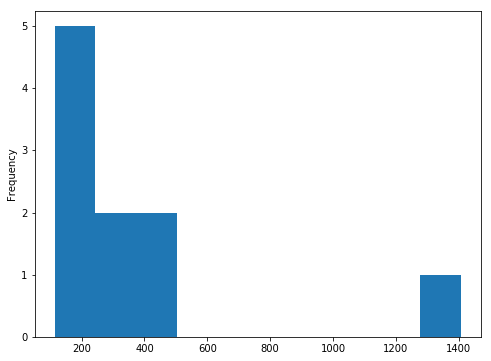

In [43]:
normally.groupby("NumCompaniesWorked").TotalWorkingYears.sum().plot(kind="hist")

## Note:
    total years of experience between 8 to 10 is not normally distributed with numof years in the company

### 8.	Divided the whole data into two groups – Group1: people with monthly salary more than the average salary of all employees and people with monthly salary less than the average salary of all employees. For each group analysis the attrition rate in each Job Role. Find the Job role which has the highest attrition rate gap across the group.  

In [44]:
hr_df.MonthlyIncome.mean()

6502.931292517007

In [48]:
def fun(df):
    if df.MonthlyIncome<6502:
        return "Group2"
    else:
        return "Group1"

In [51]:
newdf1 = pd.DataFrame()

for i, data in hr_df.iterrows():
    cur_row = pd.Series({"EmployeeNumber" : data['EmployeeNumber'],"Divided_Salary_Group" :fun(data)})
    newdf1 = newdf1.append(cur_row, ignore_index=True)

In [55]:
new_df2 = hr_df.merge(newdf1)

In [64]:
group_attrition = new_df2[["Attrition","Divided_Salary_Group","JobRole"]]
group_attrition = group_attrition[group_attrition.Attrition==1]
group_attrition.head()

,Attrition,Divided_Salary_Group,JobRole
0,1,Group2,Sales Executive
2,1,Group2,Laboratory Technician
14,1,Group2,Laboratory Technician
21,1,Group2,Sales Representative
24,1,Group2,Research Scientist


In [66]:
#attrition percentage each group and each department
group_attrition.groupby(["Divided_Salary_Group","JobRole"]).Attrition.size()

Divided_Salary_Group  JobRole                  
Group1                Healthcare Representative     8
                      Human Resources               2
                      Manager                       5
                      Manufacturing Director        5
                      Research Director             2
                      Sales Executive              30
Group2                Healthcare Representative     1
                      Human Resources              10
                      Laboratory Technician        62
                      Manufacturing Director        5
                      Research Scientist           47
                      Sales Executive              27
                      Sales Representative         33
Name: Attrition, dtype: int64

# Note:
    from group 1 salaried people sales exucutive has higher attrition rate
    and from group 2 mainly lower categories salired Laboratory Technician has higher attrition rate

# 9.How does Relationship Satisfaction affect termination?

In [78]:
satis_term = hr_df[["Attrition","RelationshipSatisfaction"]]
#filtering out only people who left
satis_term = satis_term[satis_term.Attrition==1]
#replacing satisfaction with original name
satis_term.RelationshipSatisfaction.replace([1,2,3,4],value = ["Low","Midium","High","VeryHigh"],inplace=True)
satis_term.head()

,Attrition,RelationshipSatisfaction
0,1,Low
2,1,Midium
14,1,Midium
21,1,Midium
24,1,High


In [81]:
satis_term.RelationshipSatisfaction.value_counts(normalize=True)*100

High        29.957806
VeryHigh    27.004219
Low         24.050633
Midium      18.987342
Name: RelationshipSatisfaction, dtype: float64

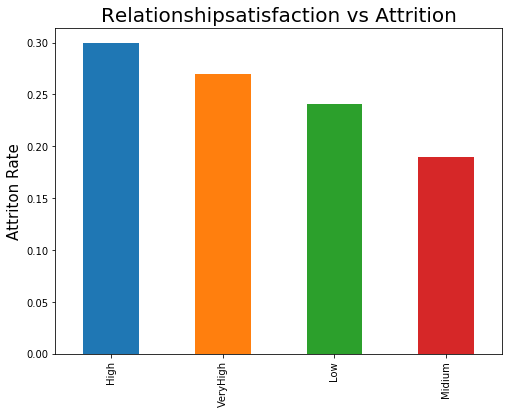

In [84]:
satis_term.RelationshipSatisfaction.value_counts(normalize=True).plot(kind="bar")
plt.title("Relationshipsatisfaction vs Attrition",fontsize=20)
plt.ylabel("Attriton Rate",fontsize=15)
plt.show()

## Note:
    from the above analysis people with higher relationship satisfaction has higher percentage of leaving the job

# 10.	Which Education field is more likely to leave?

In [85]:
education_attr = hr_df[["EducationField","Attrition"]]
education_attr = education_attr[education_attr.Attrition==1]
education_attr.head()

,EducationField,Attrition
0,Life Sciences,1
2,Other,1
14,Life Sciences,1
21,Life Sciences,1
24,Medical,1


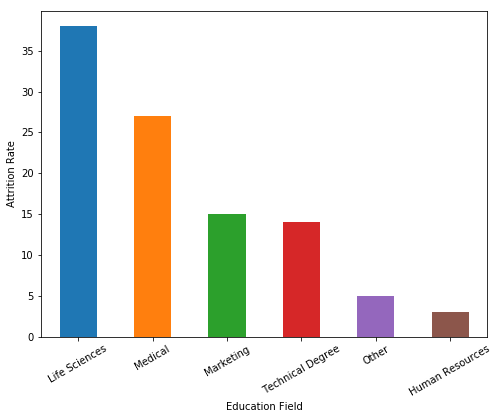

In [94]:
round(education_attr.EducationField.value_counts(normalize=True)*100).plot(kind="bar")
plt.ylabel("Attrition Rate")
plt.xlabel("Education Field")
plt.xticks(rotation=30)
plt.show()

# ==============================END============================